# Part 1, exploratory data analysis (EDA)

Вопросы:

1. [1 балл] Загрузка данных и предобработка - загрузите датасет, посмотрите на его `head` и `tail`. Похоже, у нас есть одна лишняя переменная - Rank, которая дублирует индекс и совершенно не информативна, давайте сразу её уберем. Воспользуйтесь функцией `describe()` для отображения базовых статистик переменных.
2. [2 балла] Наверное, в переменной Year вас тоже что-то смутило, а конкретно - её максимальное значение. По какой-то причине оно находится в будущем. Посмотрите, что за игра "продавалась" в этом году? Погуглите название этой игры и посмотрите, в каком году на самом деле она была  выпущена? Исправьте неверное значение года в датасете (можно при помощи среза и приравнивания).
3. [1 балл] Раз уж начали смотреть на год - давайте посмотрим на ветеранов, какие игры в датасете самые старые? 
4. [2 балла] Каковы средние продажи по миру у компании Nintendo? Какие 3 компании выпустили больше всего игр в 2010 году? 
5. [1 балл] Визуализация - Постройте гистограммы всех числовых переменных датасета при помощи одной команды. Для удобства отображения задайте размер графика `figsize` равным (25, 20).
6. [1 балл] Визуализация - При помощи `heatmap` постройте тепловую карту корреляций для всего датасета, подписав на графике все значения коэффициентов корреляции.
7. [2 балла] Группировка + Визуализация - при помощи `groupby` посчитайте  средние значения глобальных продаж для каждого возможного жанра. Добавьте `.plot.bar()` для построения столбчатой диаграммы продаж. Какой жанр, в среднем, самый прибыльный? А самый плохо продающийся?

## Итого - 10 баллов, отличная работа!

In [ ]:
########################################### ЗАДАНИЕ НАМБЕР 1

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Комментарий к решению (НАМБЕР ВАН)
Супер, с загрузкой справились ;)

In [2]:
data = pd.read_csv('C:/Users/Alex/Desktop/._Chekanov_Aleksey_vgsales.csv')

In [3]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
data.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [5]:
# выкидываем ненужную переменную
data = data.drop(['Rank'], axis=1)

In [6]:
# выведем таблицу без столбца "Rank"
data.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [7]:
data.tail()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [8]:
# отобразим базовые статистики переменных
data.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [12]:
########################################### ЗАДАНИЕ НАМБЕР 2

### Комментарий к решению (НАМБЕР ТУ)
Крутое решение, отлично! Хотя можно  было всю строчку и не дропать, а заменить только значение года в текущей, для этого достаточно было написать:

```python
data.loc[data['Year'] == 2020].Year = 2007
```

In [9]:
# выясним какие еще игры могли "улететь" на DeLorean в будущее
# для этого сортируем года по убыванию
data.sort_values(by = 'Year', ascending = False)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
5957,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0.00,0.00,0.02,0.29
14390,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0.00,0.00,0.03,0.00,0.03
16241,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0.00,0.00,0.01,0.00,0.01
16438,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0.00,0.00,0.01,0.00,0.01
8293,Shin Megami Tensei IV: Final,3DS,2016.0,Role-Playing,Deep Silver,0.03,0.00,0.14,0.00,0.17
13647,Hitman (2016),PS4,2016.0,Action,Square Enix,0.00,0.04,0.00,0.01,0.04
13596,Card Fight!! Vanguard G: Stride to Victory!!,3DS,2016.0,Misc,FuRyu,0.00,0.00,0.04,0.00,0.04
13602,Refrain no Chika Meikyuu to Majo no Ryodan,PSV,2016.0,Action,Nippon Ichi Software,0.00,0.00,0.04,0.00,0.04
13614,Utawarerumono: Futari no Hakuoro,PS4,2016.0,Misc,Aqua Plus,0.00,0.00,0.04,0.00,0.04
13620,Kamen Rider: Battride War Genesis,PS3,2016.0,Action,Namco Bandai Games,0.00,0.00,0.04,0.00,0.04


In [10]:
# Imagine: Makeup Artist, к счастью, единственная игра, побывавшая в будущем
# Google подсказал, что игра, на самом деле, была выпущена в далеком 2007 году
# исправим это недоразумение
# запомним значения строчки "5957": Imagine: Makeup Artist, DS, 2007, Simulation, Ubisoft, 0.27, 0.00, 0.00, 0.02, 0.29
# удалим строчку 5957
data = data.loc[data['Year'] != 2020]

In [11]:
# проверяем удаление нужной строки
data.sort_values(by = 'Year', ascending = False)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16438,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0.00,0.00,0.01,0.00,0.01
16241,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0.00,0.00,0.01,0.00,0.01
14390,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0.00,0.00,0.03,0.00,0.03
3145,NBA 2K17,XOne,2016.0,Sports,Take-Two Interactive,0.54,0.04,0.00,0.07,0.64
15184,Sengoku Otome: Legend Battle,PSV,2016.0,Action,Unknown,0.00,0.00,0.02,0.00,0.02
16260,Paragon,PS4,2016.0,Action,Epic Games,0.01,0.00,0.00,0.00,0.01
15166,Aegis of Earth: Protonovus Assault,PS4,2016.0,Action,PQube,0.02,0.00,0.00,0.00,0.02
9250,Far Cry: Primal,PC,2016.0,Action,Ubisoft,0.04,0.09,0.00,0.01,0.14
5056,FIFA 17,PS3,2016.0,Sports,Electronic Arts,0.02,0.29,0.01,0.05,0.38
16252,The Book of Unwritten Tales 2,WiiU,2016.0,Adventure,Nordic Games,0.00,0.01,0.00,0.00,0.01


In [12]:
# теперь добавим исправленную строчку
data.loc[len(data)] = ['Imagine: Makeup Artist', 'DS', 2007, 'Simulation', 'Ubisoft', 0.27, 0.00, 0.00, 0.02, 0.29]

In [13]:
# проверка
data[data['Name'] == 'Imagine: Makeup Artist']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16597,Imagine: Makeup Artist,DS,2007.0,Simulation,Ubisoft,0.27,0.0,0.0,0.02,0.29


In [18]:
########################################### ЗАДАНИЕ НАМБЕР 3

### Комментарий к решению (НАМБЕР ФРИ)
Отлично!

In [14]:
# посмотрим на ветеранов игровой индустрии
# соответсвенно сортируем годы по возрастанию
data.sort_values(by = 'Year', ascending = True).head(9)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1766,Kaboom!,2600,1980.0,Misc,Activision,1.07,0.07,0.0,0.01,1.15
6317,Bridge,2600,1980.0,Misc,Activision,0.25,0.02,0.0,0.00,0.27
544,Missile Command,2600,1980.0,Shooter,Atari,2.56,0.17,0.0,0.03,2.76
4025,Ice Hockey,2600,1980.0,Sports,Activision,0.46,0.03,0.0,0.01,0.49
258,Asteroids,2600,1980.0,Shooter,Atari,4.00,0.26,0.0,0.05,4.31
6896,Checkers,2600,1980.0,Misc,Atari,0.22,0.01,0.0,0.00,0.24
1969,Defender,2600,1980.0,Misc,Atari,0.99,0.05,0.0,0.01,1.05
2669,Boxing,2600,1980.0,Fighting,Activision,0.72,0.04,0.0,0.01,0.77
5366,Freeway,2600,1980.0,Action,Activision,0.32,0.02,0.0,0.00,0.34


In [20]:
# 9 игр берут своё начало аж в 1980 году

In [21]:
########################################### ЗАДАНИЕ НАМБЕР 4

### Комментарий к решению (НАМБЕР ФОР)
Шикарно, топчик выявлен

In [15]:
# посмотрим на средние мировые продажи у компании Nintendo
data[data['Publisher'] == 'Nintendo']['Global_Sales'].mean()

2.5413371266002818

In [42]:
# теперь выясним, какие 3 компании выпустили больше всего игр в 2010 году
top = data[data['Year'] == 2010]['Publisher'].value_counts()
top [:3] 

Activision         89
Electronic Arts    88
Ubisoft            72
Name: Publisher, dtype: int64

In [24]:
# таким образом, тройкой лидеров являются ACTIVISION, EA, UBISOFT

In [25]:
########################################### ЗАДАНИЕ НАМБЕР 5

### Комментарий к решению (НАМБЕР ФАЙВ)
Вот такие красивые столбики появились из-за больших выбросов в продажах - большинство компаний продают на не самые значительные суммы, а отдельные ребятки умудряются заработать десятки миллионов

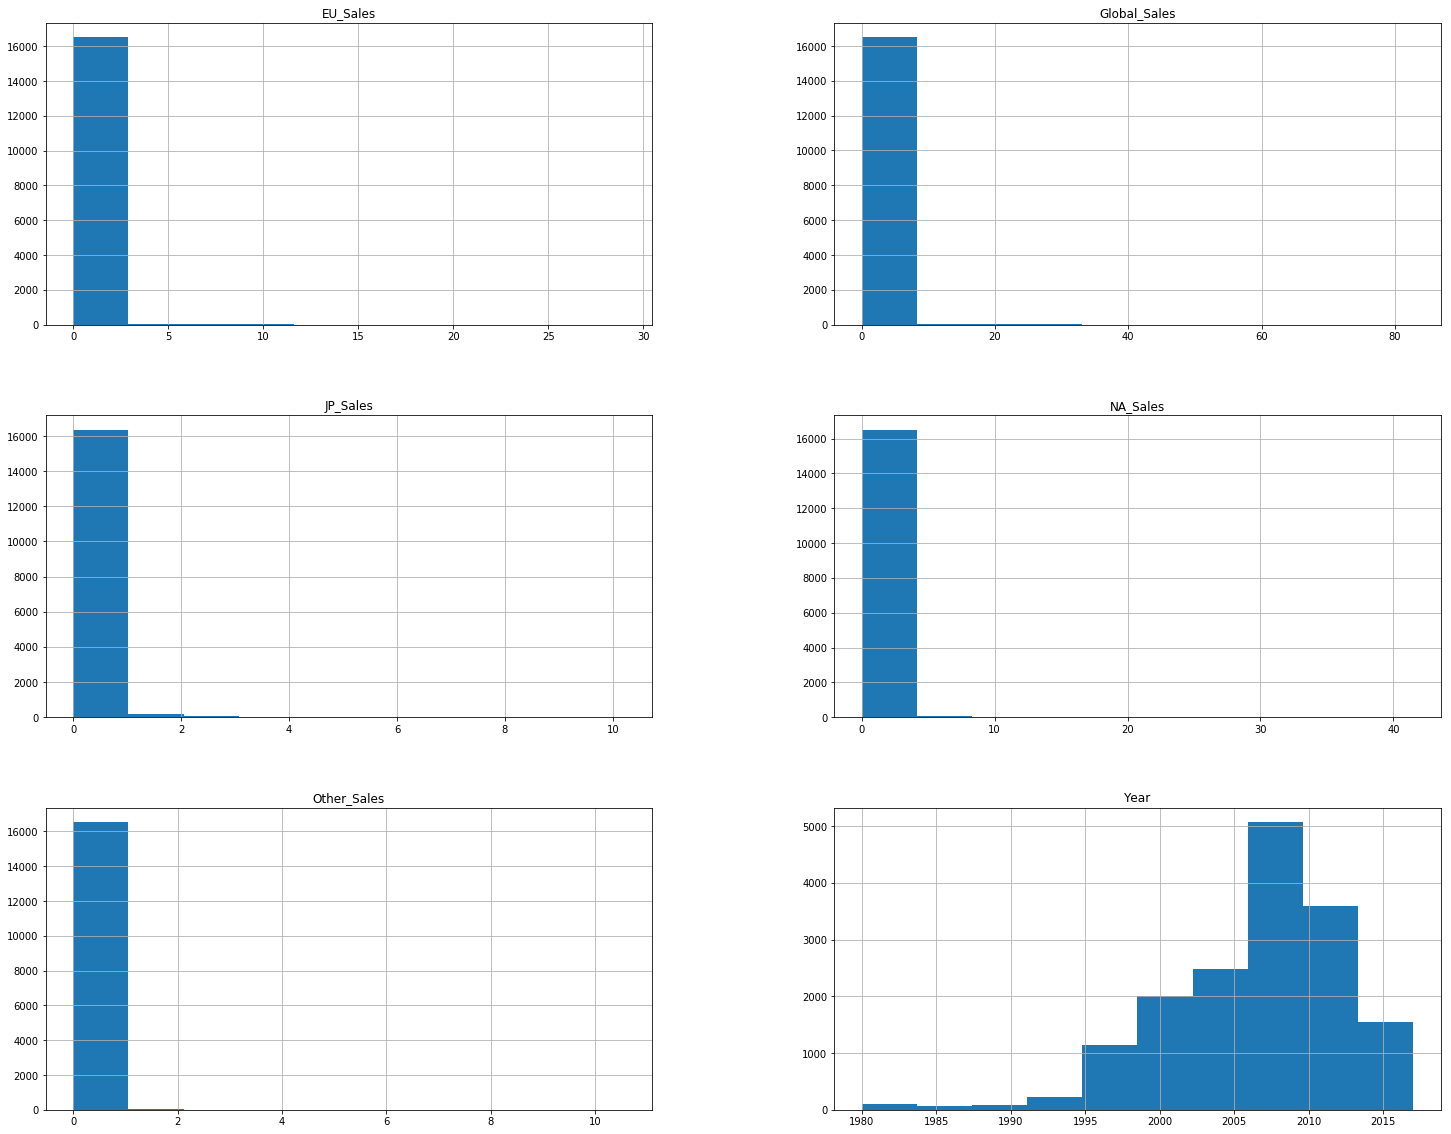

In [16]:
# построим гистограммы всех числовых переменных датасета
data_numeric = data.drop(['Name', 'Platform', 'Genre', 'Publisher'], axis = 1)
data_numeric.hist(figsize = (25, 20));

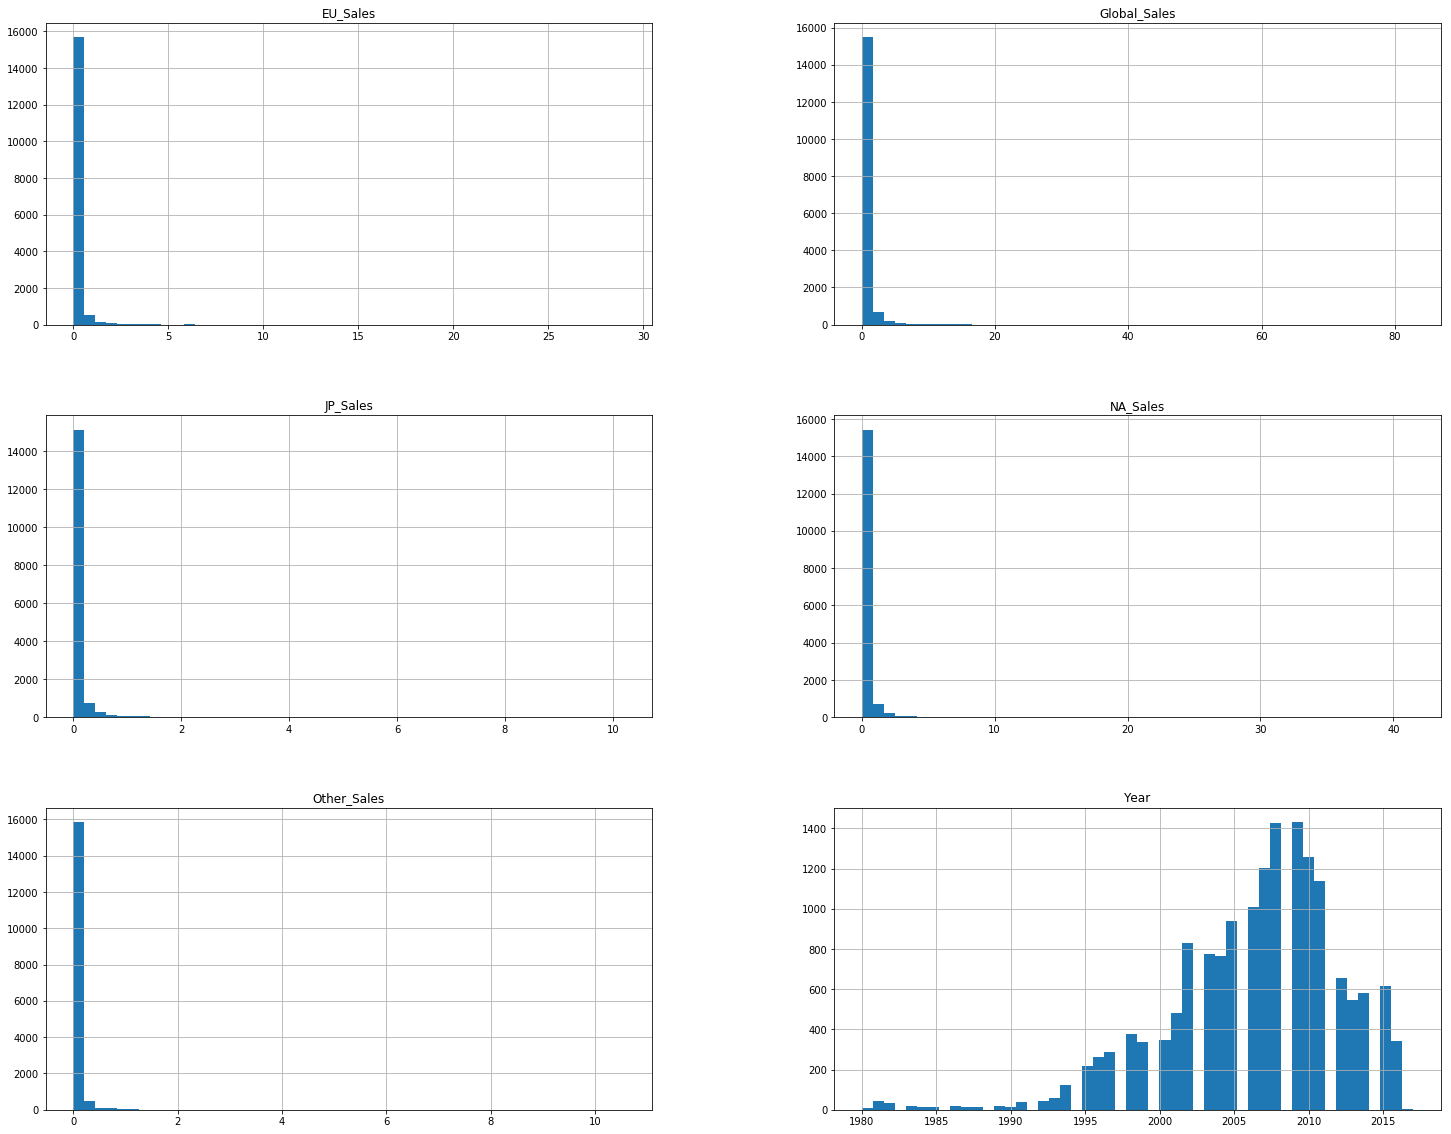

In [44]:
# к сожалению, данные распределены крайне неравномерно
# для большей наглядности сделаем столбцы тоньше
data_numeric.hist(figsize = (25, 20), bins = (50));

In [28]:
########################################### ЗАДАНИЕ НАМБЕР 6

### Комментарий к решению (НАМБЕР СИКС)
Супер, всё верно

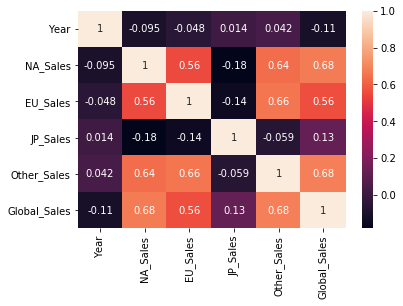

In [20]:
# построим тепловую карту корреляций для всего датасета
data_numeric = data.drop(['Name', 'Platform', 'Genre', 'Publisher'], axis = 1)
sns.heatmap(data_numeric.corr('kendall'), annot = True)

In [ ]:
########################################### ЗАДАНИЕ НАМБЕР 7

### Комментарий к решению (ФАЙНАЛ РАУНД)
Прекрасно, действительно платформеры зарабатывают больше всего, а вот приключенческие ребятки совсем вымирают в индустрии

In [37]:
# посчитаем средние значения глобальных продаж для каждого возможного жанра
data.groupby (['Genre'])['Global_Sales'].mean()

Genre
Action          0.528100
Adventure       0.185879
Fighting        0.529375
Misc            0.465762
Platform        0.939390
Puzzle          0.420876
Racing          0.586101
Role-Playing    0.623233
Shooter         0.791885
Simulation      0.452364
Sports          0.567319
Strategy        0.257151
Name: Global_Sales, dtype: float64

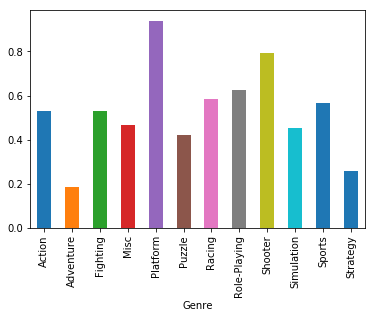

In [38]:
# визуализируем данные по средним продажам жанров
data.groupby (['Genre'])['Global_Sales'].mean().plot.bar()

In [ ]:
# таким образом, самым продающимся жанром является ПЛАТФОРМЕР, а самым малопродающимся ПРИКЛЮЧЕНЧЕСКИЙ жанр
########################################### Спасибо за внимание, Дмитрий :) 